In [1]:
#import the libraries
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
#import dataset
#print dataset details
data=pd.read_excel('Spotify Dataset.xlsx', index_col=1)
data=data.dropna()
print(data.shape)
print(list(data.columns))
print(data.ndim)

(99999, 20)
['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play', 'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']
2


In [3]:
#print first taste of the dataset
data.head()

,session_id,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,,,,,,,,,
1,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_f56065b2-b26f-4080-a121-ff3bf5d25fd6,False,False,False,True,0,0,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,trackdone
2,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_447a276d-5b3d-44cf-bcbe-834ad91e7b72,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,trackdone,fwdbtn
3,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_07a8a863-2f51-4e64-ae3c-2fac451a0651,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
4,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_d2a13f32-05a8-4f7b-8633-4ed8a74ca560,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
5,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_0368bff8-85c0-4162-b1ca-18c526b14d3a,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn


In [4]:
#show the data types of the variables
data.dtypes

session_id                                 object
session_length                              int64
track_id_clean                             object
skip_1                                       bool
skip_2                                       bool
skip_3                                       bool
not_skipped                                  bool
context_switch                              int64
no_pause_before_play                        int64
short_pause_before_play                     int64
long_pause_before_play                      int64
hist_user_behavior_n_seekfwd                int64
hist_user_behavior_n_seekback               int64
hist_user_behavior_is_shuffle                bool
hour_of_day                                 int64
date                               datetime64[ns]
premium                                      bool
context_type                               object
hist_user_behavior_reason_start            object
hist_user_behavior_reason_end              object


In [5]:
#check if there are null values 
print('we have ' ,len(data), ' rows')
data.isnull().sum().sort_values(ascending = False)

we have  99999  rows


hist_user_behavior_reason_end      0
hist_user_behavior_reason_start    0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
session_id                         0
dtype: int64

In [6]:
#get rid of the variables that we don't need. using inplace we modify the original dataset 
data.drop(['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'hour_of_day', 'date'], axis=1, inplace=True)

In [7]:
#show the modified dataset
data.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,
1,True,0,0,0,0,0,0,False,True,radio,fwdbtn,trackdone
2,False,0,1,0,0,0,0,False,True,radio,trackdone,fwdbtn
3,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn
4,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn
5,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn


In [8]:
#turn the booleans into int variables
data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]=(data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]==True).astype(int)

In [9]:
#get the dummies for the last three columns of strings
dummy = pd.get_dummies(data[['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end']], drop_first = True)
dummy.head()

,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [10]:
#build the final dataset with the dummies
#dropping the original variables that we turned into dummies
df = pd.concat([data, dummy], axis=1)
df.drop(['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end'], inplace=True, axis=1)

In [11]:
df.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type_charts,...,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
#correlation
corrmat = df.corr()
corrmat

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type_charts,...,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
not_skipped,1.000000,0.035065,0.067556,-0.136628,-0.103035,-0.079500,0.035954,-0.037785,0.010437,-0.009447,...,-0.000805,-0.009778,0.382477,-0.003331,-0.003201,-0.222586,-0.667889,-0.022438,-0.028147,0.958458
context_switch,0.035065,1.000000,0.036393,0.004123,0.025550,0.015144,0.008987,-0.031011,0.018259,-0.007543,...,0.011130,0.026246,-0.148956,-0.003508,-0.000953,0.162686,-0.099526,0.005304,0.008187,0.035686
no_pause_before_play,0.067556,0.036393,1.000000,-0.635650,-0.701967,-0.084106,-0.100363,-0.013460,0.015880,0.002102,...,-0.050720,-0.022254,-0.239827,-0.007970,-0.002081,-0.122259,0.009965,-0.022539,-0.036310,0.054093
short_pause_before_play,-0.136628,0.004123,-0.635650,1.000000,0.905527,-0.007502,0.033643,0.029308,0.024382,0.003720,...,-0.012491,-0.003480,0.316846,0.000932,-0.001813,0.052786,0.105936,0.011873,-0.005945,-0.141992
long_pause_before_play,-0.103035,0.025550,-0.701967,0.905527,1.000000,-0.000443,0.047823,0.018753,-0.012385,0.000290,...,-0.010796,0.006333,0.321689,0.002262,-0.002002,0.063667,0.070379,0.017171,-0.001127,-0.107452
hist_user_behavior_n_seekfwd,-0.079500,0.015144,-0.084106,-0.007502,-0.000443,1.000000,0.128275,-0.026283,0.000436,0.005315,...,0.008722,0.070050,-0.083723,0.003786,-0.000645,0.051601,-0.002029,0.032455,0.011479,-0.023760
hist_user_behavior_n_seekback,0.035954,0.008987,-0.100363,0.033643,0.047823,0.128275,1.000000,-0.037248,-0.009198,-0.002591,...,0.000690,0.012055,0.004289,0.000454,-0.000586,0.001440,-0.086814,0.001774,0.006537,0.001778
hist_user_behavior_is_shuffle,-0.037785,-0.031011,-0.013460,0.029308,0.018753,-0.026283,-0.037248,1.000000,0.092477,0.019075,...,0.010904,0.010156,-0.036710,0.014076,-0.002933,-0.054071,0.118104,-0.002894,-0.001566,-0.038967
premium,0.010437,0.018259,0.015880,0.024382,-0.012385,0.000436,-0.009198,0.092477,1.000000,0.006885,...,-0.000939,0.007983,-0.013820,0.000286,0.002159,0.004304,0.007148,0.002898,0.005255,0.011603
context_type_charts,-0.009447,-0.007543,0.002102,0.003720,0.000290,0.005315,-0.002591,0.019075,0.006885,1.000000,...,-0.000909,-0.004409,-0.010336,-0.000271,-0.000584,-0.003287,0.018721,-0.004211,-0.001494,-0.010871


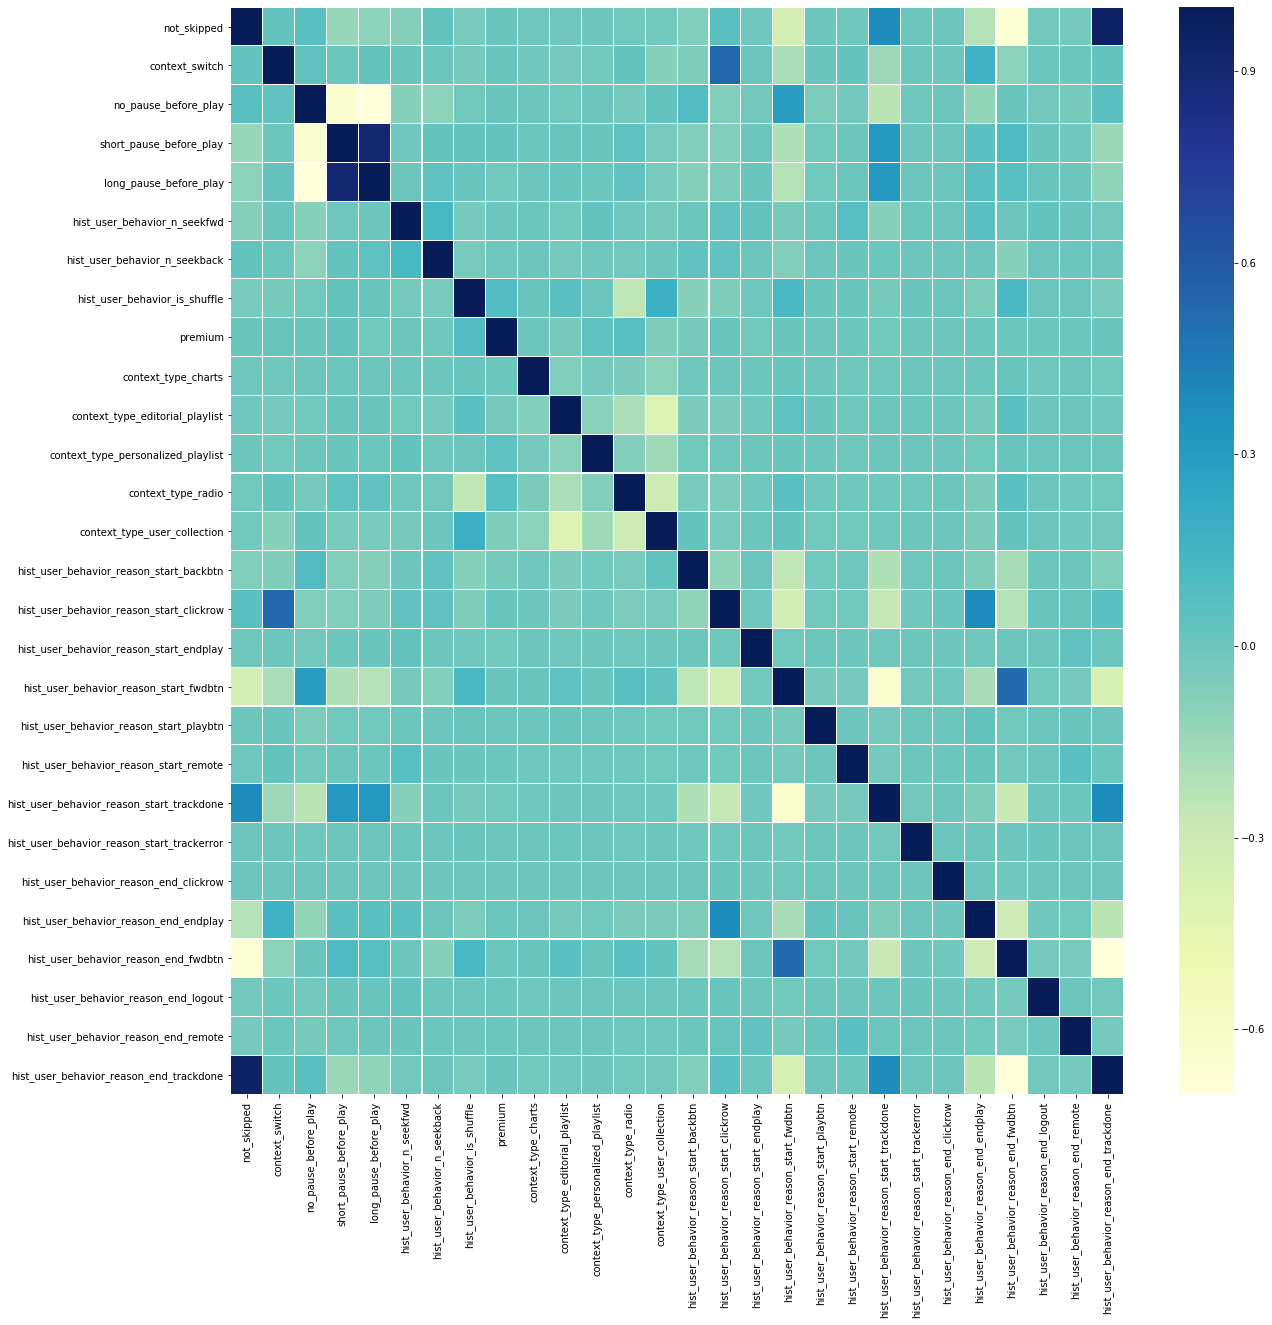

In [13]:
#show the heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.show()

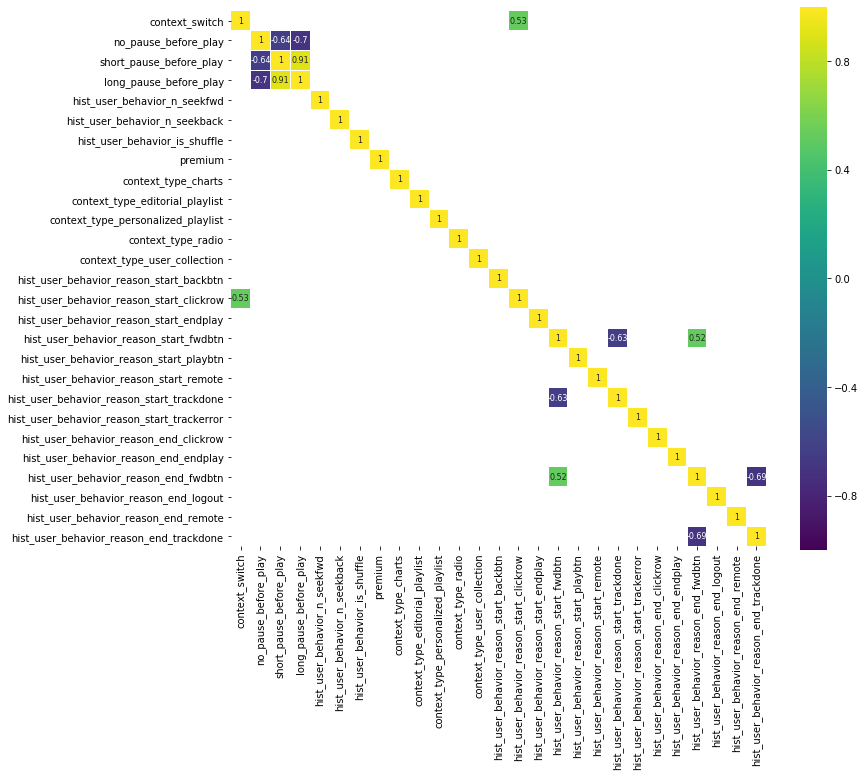

In [14]:
#check for multicollinearity
corr = df.drop('not_skipped', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [15]:
df.drop('long_pause_before_play', axis=1, inplace= True)

In [16]:
#explore  not_skipped which is gonna be our target variable
df['not_skipped'].describe()

count    99999.000000
mean         0.338733
std          0.473281
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: not_skipped, dtype: float64

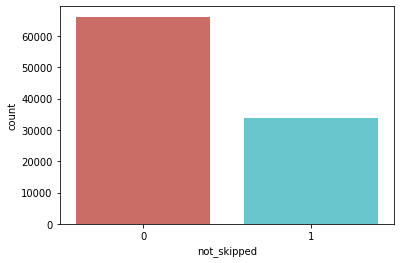

<Figure size 432x288 with 0 Axes>

In [17]:
#let's have a look at how our variable is composed
#our y is pretty much balanced, we don't need undersampling 
df['not_skipped'].value_counts()
sns.countplot(x='not_skipped', data=df, palette= 'hls')
plt.show()
plt.savefig('Skipping_Behaviour')

In [18]:
#continue the data exploring getting some percentages 
count_skipped=len(data[df['not_skipped']==False])
count_played=len(data[df['not_skipped']==True])
pct_skipped=count_skipped/(count_skipped+count_played)
print('the percentage of songs skipped is', pct_skipped*100)
pct_played=count_played/(count_played+count_skipped)
print('the percentage of songs fully played is', pct_played*100)

the percentage of songs skipped is 66.12666126661266
the percentage of songs fully played is 33.87333873338733


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.55257745e-03 4.92102506e-03 2.21486169e-02 2.01811205e-02
 1.31391131e-02 9.35279098e-04 7.13630882e-04 1.42705347e-04
 6.26180679e-04 1.67385818e-04 4.29747652e-04 8.18856840e-04
 9.31502948e-03 7.44584684e-03 9.50062290e-05 2.17246698e-03
 3.00284024e-04 1.91601126e-04 5.09701112e-02 3.77079852e-05
 1.64492741e-05 5.16361478e-02 3.26033121e-01 2.60705814e-04
 8.95524004e-04 4.83853759e-01]


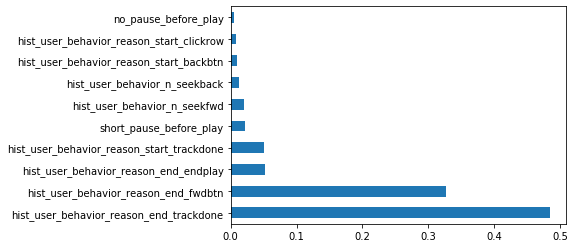

In [19]:
data = df
X = df.iloc[:,1:]  #independent columns
y = df['not_skipped']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [20]:
data_fin = df[['not_skipped','hist_user_behavior_reason_start_backbtn', 'hist_user_behavior_reason_start_clickrow', 'no_pause_before_play', 'hist_user_behavior_n_seekback','short_pause_before_play','hist_user_behavior_n_seekfwd', 'hist_user_behavior_reason_end_endplay','hist_user_behavior_reason_start_trackdone','hist_user_behavior_reason_end_fwdbtn','hist_user_behavior_reason_end_trackdone']]
data_fin.head()

,not_skipped,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,no_pause_before_play,hist_user_behavior_n_seekback,short_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,1,0


In [21]:
#then VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_set = data_fin.copy().drop(columns=['not_skipped'])
cols=VIF_set.columns
VIF_set = add_constant(VIF_set.values)
pd.Series(["{0:.2f}".format(variance_inflation_factor(VIF_set, i)) for i in range(VIF_set.shape[1])], index=['constant'] + list(cols))

constant                                     25.53
hist_user_behavior_reason_start_backbtn       1.45
hist_user_behavior_reason_start_clickrow      1.44
no_pause_before_play                          1.77
hist_user_behavior_n_seekback                 1.06
short_pause_before_play                       1.91
hist_user_behavior_n_seekfwd                  1.04
hist_user_behavior_reason_end_endplay         2.55
hist_user_behavior_reason_start_trackdone     1.73
hist_user_behavior_reason_end_fwdbtn          4.85
hist_user_behavior_reason_end_trackdone       4.57
dtype: object

In [22]:
#define my target variable and the regressors 
X = data_fin.drop('not_skipped', axis=1)
y = data_fin['not_skipped']
print(X.shape)
print(y.shape)

(99999, 10)
(99999,)


In [23]:
#split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79999, 10)
(20000, 10)
(79999,)
(20000,)


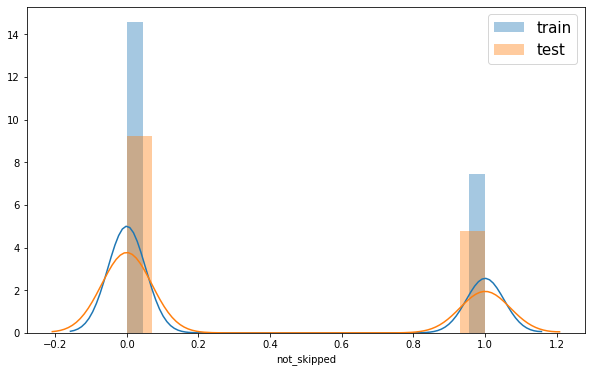

In [24]:
# check target distribution of train and test set
plt.figure(figsize=(10,6))
sns.distplot(y_train, label='train')
sns.distplot(y_test, label='test')
plt.legend(fontsize=15)
plt.show()

In [25]:
# fit the model with the "nice" summary first
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

# please always check that algo converged (Converged: 1)

Optimization terminated successfully.
         Current function value: 0.070560
         Iterations 10
                                      Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.890     
Dependent Variable:          not_skipped              AIC:                      11309.4721
Date:                        2020-02-02 13:28         BIC:                      11402.3698
No. Observations:            79999                    Log-Likelihood:           -5644.7   
Df Model:                    9                        LL-Null:                  -51192.   
Df Residuals:                79989                    LLR p-value:              0.0000    
Converged:                   1.0000                   Scale:                    1.0000    
No. Iterations:              10.0000                                                      
------------------------------------------------------------------------------------------
                         

In [26]:
# fit the model on training set

model = LogisticRegression(solver='lbfgs', random_state=0, penalty='none', max_iter=1)
model.fit(X_train, y_train) # training the algorithm

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# algo didn't converge, always check for convergence!

model = LogisticRegression(solver='lbfgs', random_state=0, penalty='none')
print(model.fit(X_train, y_train)) # training the algorithm

print('\nNumber of iterations: ' + str(model.n_iter_[0]) + '/' + str(model.max_iter))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Number of iterations: 31/100


In [28]:
# get coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)
pd.DataFrame({'Variable': ['intercept'] + list(X.columns),
              'Coefficient': ["{0:.5f}".format(v) for v in np.append(model.intercept_,model.coef_.flatten()).round(6)]})

Intercept: [-7.36907455]
Slope: [[ 1.05250388e-01 -1.15831124e-03 -7.46403483e-02  2.25555323e+00
  -5.70964270e-01 -5.08986077e+00  2.60707214e+00  4.95981084e-01
   1.19948110e+00  1.09263649e+01]]


,Variable,Coefficient
0,intercept,-7.36907
1,hist_user_behavior_reason_start_backbtn,0.10525
2,hist_user_behavior_reason_start_clickrow,-0.00116
3,no_pause_before_play,-0.07464
4,hist_user_behavior_n_seekback,2.25555
5,short_pause_before_play,-0.57096
6,hist_user_behavior_n_seekfwd,-5.08986
7,hist_user_behavior_reason_end_endplay,2.60707
8,hist_user_behavior_reason_start_trackdone,0.49598
9,hist_user_behavior_reason_end_fwdbtn,1.19948


In [30]:
X_train, y_train = np.array(y_train), np.array(X_train)
y_train.reshape(1, -1)

# get fitted value on training set
y_train_predicted = model.predict(X_train)

# compare predictions
display(pd.DataFrame({'True': y_train.flatten(), 'Predicted': y_train_predicted.flatten()}))

# compare predicted probabilities (default threshold for converting to 0 or 1 is 0.5)
y_train_predicted_prob = model.predict_proba(X_train)[:,1]
display(pd.DataFrame({'True': y_train.flatten(), 'Predicted_prob': y_train_predicted_prob.flatten(), 'Predicted': y_train_predicted.flatten()}))

,True,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


,True,Predicted_prob,Predicted
0,0,5.264624e-05,0
1,0,7.868520e-03,0
2,1,9.816324e-01,1
3,1,9.701801e-01,1
4,1,9.701901e-01,1
5,0,9.780459e-03,0
6,0,6.496256e-04,0
7,1,9.701901e-01,1
8,1,9.816324e-01,1
9,0,1.180592e-03,0


Confusion matrix, without normalization
[[52299   636]
 [  243 26821]]


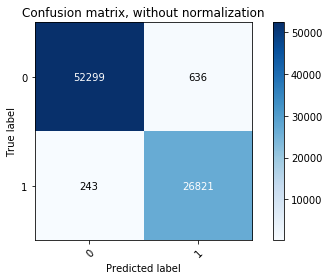

In [31]:
# evaluate confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['0', '1']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_train, y_train_predicted)
plt.show()

In [32]:
# evaluate precision, recall, F1-score on train set
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52935
           1       0.98      0.99      0.98     27064

    accuracy                           0.99     79999
   macro avg       0.99      0.99      0.99     79999
weighted avg       0.99      0.99      0.99     79999



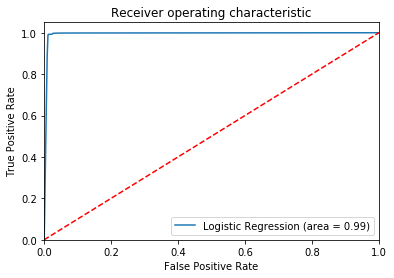

In [33]:
# evaluate ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, y_train_predicted)
fpr, tpr, thresholds = roc_curve(y_train, y_train_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

(0, 1)

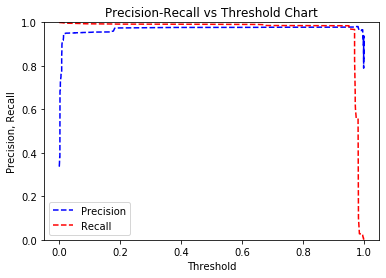

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_predicted_prob) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

Confusion matrix, without normalization
[[13047   144]
 [   60  6749]]


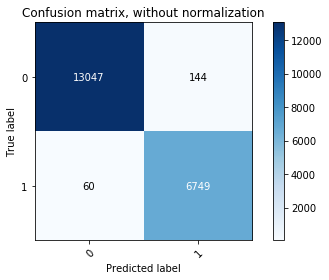

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13191
           1       0.98      0.99      0.99      6809

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



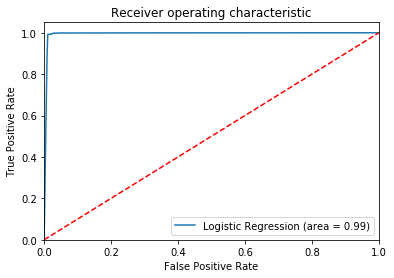

(0, 1)

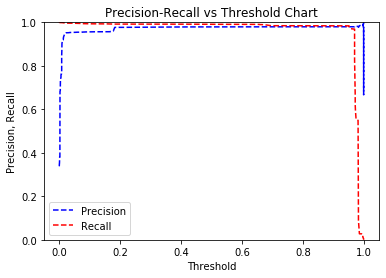

In [35]:
# evaluate performance on test set
y_test_predicted = model.predict(X_test)
y_test_predicted_prob = model.predict_proba(X_test)[:,1]

plot_confusion_matrix(y_test, y_test_predicted)
plt.show()

print(classification_report(y_test, y_test_predicted))

logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_test_predicted_prob) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

(0, 1)

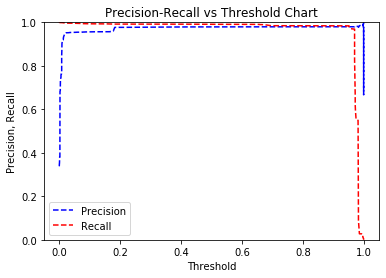

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predicted_prob) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [37]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def fit_model(X_input_train, X_input_test, y_train, y_test, penalty, n_fold):

    if penalty=='none':
        model = LogisticRegression(solver='lbfgs', random_state=0, penalty=penalty)
        model.fit(X_input_train, y_train) # training the algorithm
    else:
        model = LogisticRegressionCV(solver='liblinear', cv=n_fold, random_state=0, penalty=penalty)
        model.fit(X_input_train, y_train) # training the algorithm
        lambda_set=model.Cs_
        best_lambda=model.C_
        best_lambda_index=np.where(lambda_set == best_lambda)[0]
        coeff_paths=model.coefs_paths_[1]

        # plot coeff paths
        coeff_paths=coeff_paths.mean(axis=0)
        avg_accuracy_cv=model.scores_[1].mean(axis=0)
        y_axis_range=[coeff_paths.min()*1.2, coeff_paths.max()*1.2]
        fig, ax1 = plt.subplots(figsize=(15,15))
        for i in range(0,coeff_paths.shape[1]):
            if i<coeff_paths.shape[1]-1:
                var_lab=X_input_train.columns[i]
            else:
                var_lab='intercept'
            ax1.plot(range(0,len(lambda_set)), coeff_paths[:,i], label=var_lab)
            ax1.tick_params(axis='y', labelcolor='black', labelsize=20)
            ax1.set_ylabel('coefficients', color='black', fontsize=25)
            ax1.set_xlabel('lambda', color='black', fontsize=25)
            ax1.set_xticks(range(0,len(lambda_set)))
            ax1.set_xticklabels(lambda_set.round(5), color='black', fontsize=15, rotation=45)
        ax1.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=22, ncol=2)
        ax1.set_title('\nCoefficients magnitude vs lambda values\n', fontsize=35)

        # second axis scale for accuracy
        ax2 = ax1.twinx()
        ax2.set_ylabel('Cross-Validated Accuracy', color='dodgerblue', fontsize=25)
        ax2.plot((avg_accuracy_cv*100).round(4), color='dodgerblue', linestyle='--', linewidth=7, label='accuracy')
        ax2.tick_params(axis='y', labelcolor='dodgerblue', labelsize=20)
        ax2.set_yticklabels(['{:,.2%}'.format(x) for x in avg_accuracy_cv])
        # vertical line corresponding to best Lambda
        ax2.axvline(best_lambda_index, color='red', linestyle='--', linewidth=7, label='best Lambda')
        ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=25)
        plt.show()

    coeff=pd.DataFrame({'Variable': ['intercept'] + list(X_input_train.columns),
                  'Coefficient': ["{0:.8f}".format(v) for v in np.append(model.intercept_,model.coef_.flatten()).round(6)]})
    display(coeff)

    y_train_predicted = model.predict(X_input_train)
    y_train_predicted_prob = model.predict_proba(X_input_train)[:,1]

    y_test_predicted = model.predict(X_input_test)
    y_test_predicted_prob = model.predict_proba(X_input_test)[:,1]

    train_accuracy=accuracy_score(y_train, y_train_predicted)
    test_accuracy=accuracy_score(y_test, y_test_predicted)

    train_precision=precision_score(y_train, y_train_predicted, average='macro')
    test_precision=precision_score(y_test, y_test_predicted, average='macro')

    train_recall=recall_score(y_train, y_train_predicted, average='macro')
    test_recall=recall_score(y_test, y_test_predicted, average='macro')

    results = pd.DataFrame({'Penalty': [penalty],
                            'Train_Accuracy': [train_accuracy], 'Test_Accuracy': [test_accuracy],
                            'Train_Precision': [train_precision], 'Test_Precision': [test_precision],
                            'Train_Recall': [train_recall], 'Test_Recall': [test_recall]})
    
    display(results)
    
    return results

In [38]:
X_orig = df.drop(columns=['not_skipped'])
y_orig = df['not_skipped'].values
print(X.shape)
print(y.shape)

(99999, 10)
(99999,)


In [39]:
#split in train and test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79999, 10)
(20000, 10)
(79999,)
(20000,)


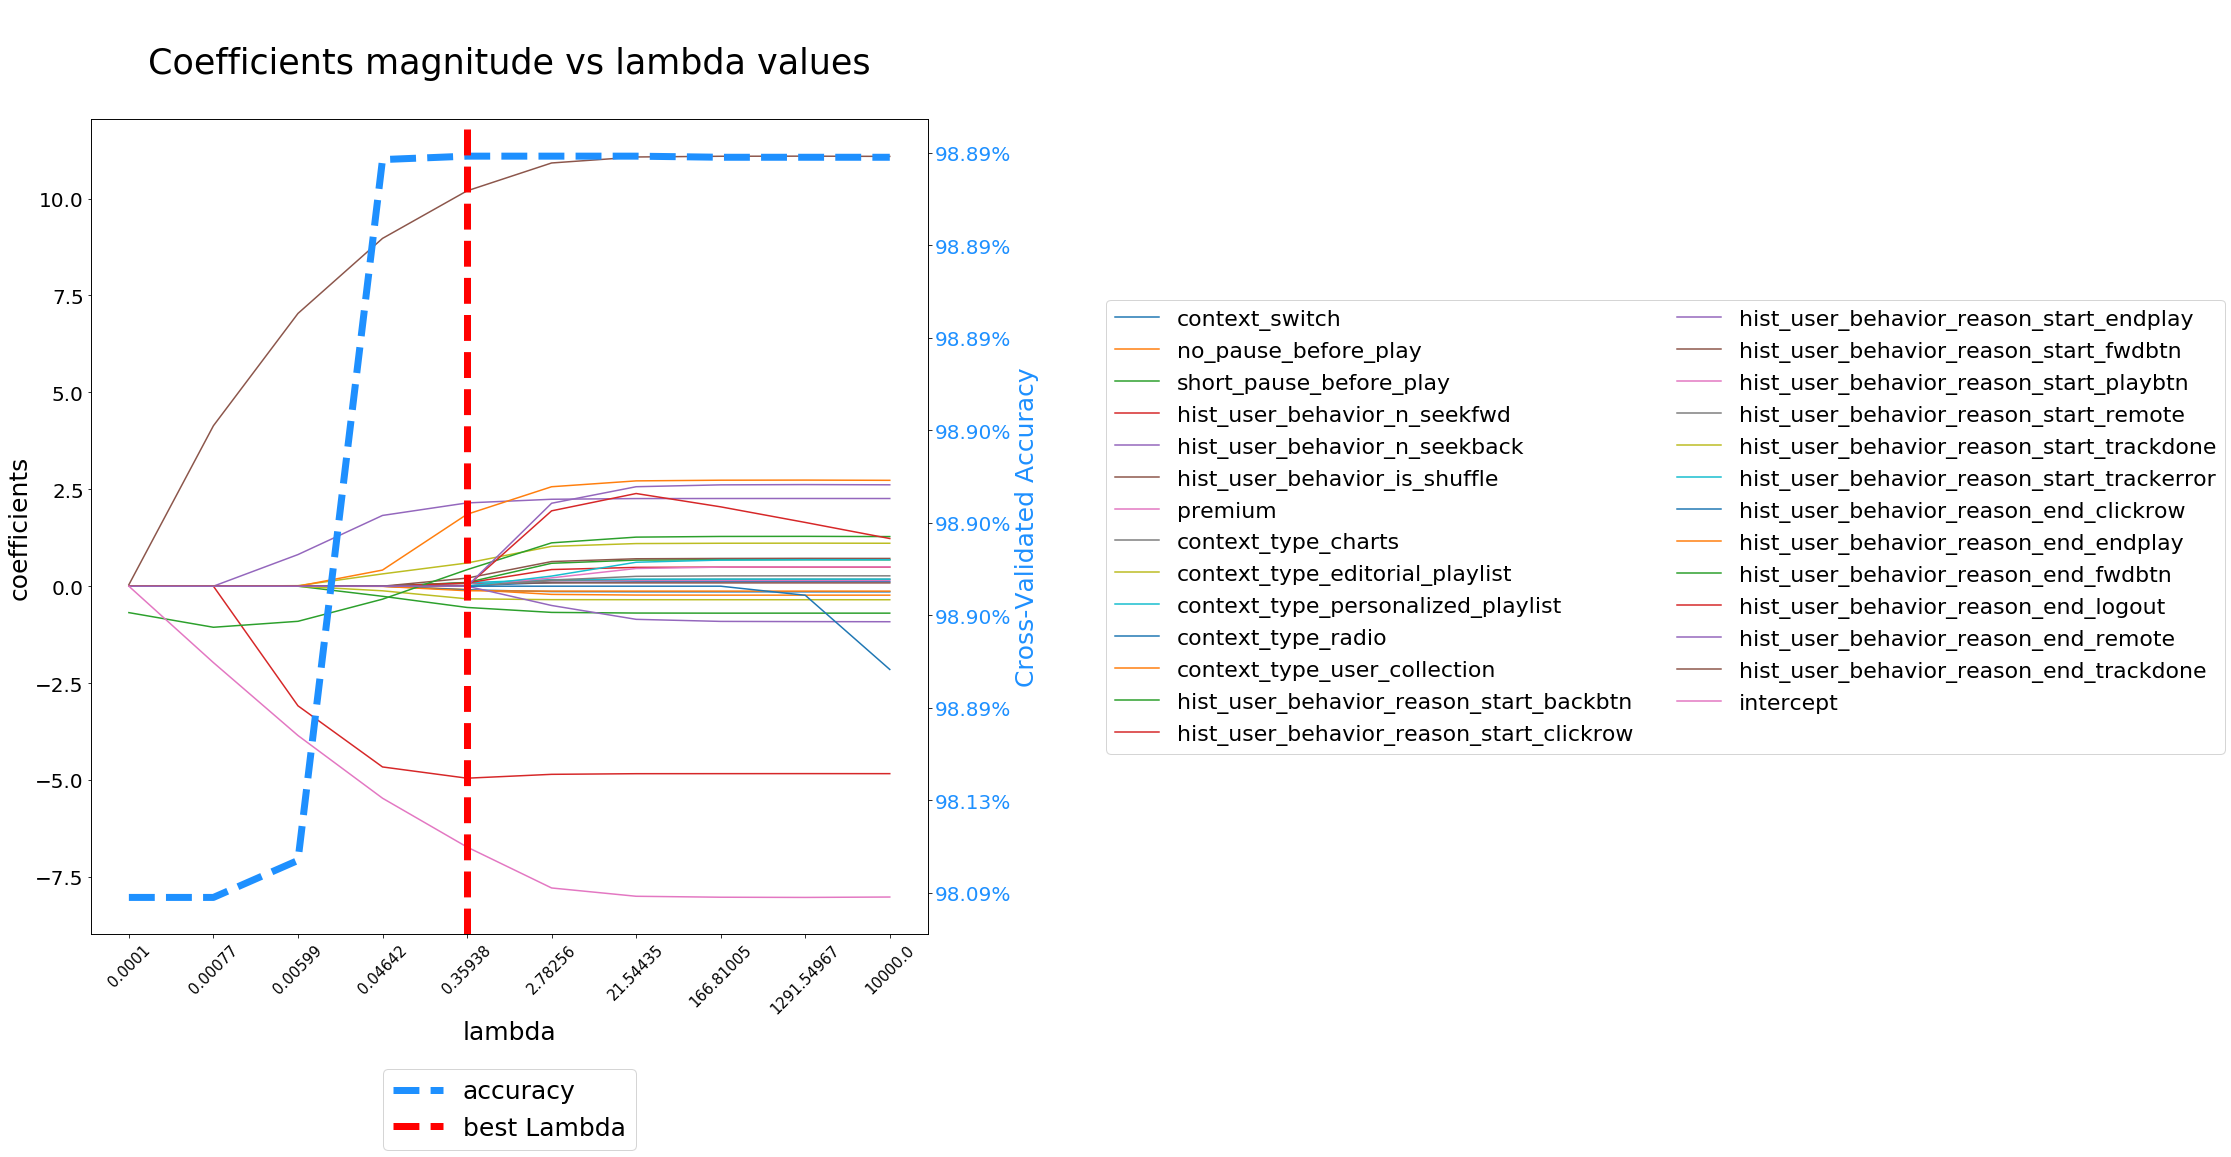

,Variable,Coefficient
0,intercept,-6.91614100
1,context_switch,0.00000000
2,no_pause_before_play,-0.10974700
3,short_pause_before_play,-0.57544000
4,hist_user_behavior_n_seekfwd,-4.92142000
5,hist_user_behavior_n_seekback,2.15692100
6,hist_user_behavior_is_shuffle,0.07431900
7,premium,0.09535100
8,context_type_charts,0.00000000
9,context_type_editorial_playlist,-0.33413400


,Penalty,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,l1,0.989025,0.98975,0.986132,0.987226,0.989504,0.990062


In [40]:
# fit LASSO on original dataset with all variables (so that some will be set to 0)

results_LASSO = fit_model(X_train_orig, X_test_orig, y_train, y_test, penalty='l1', n_fold=5)

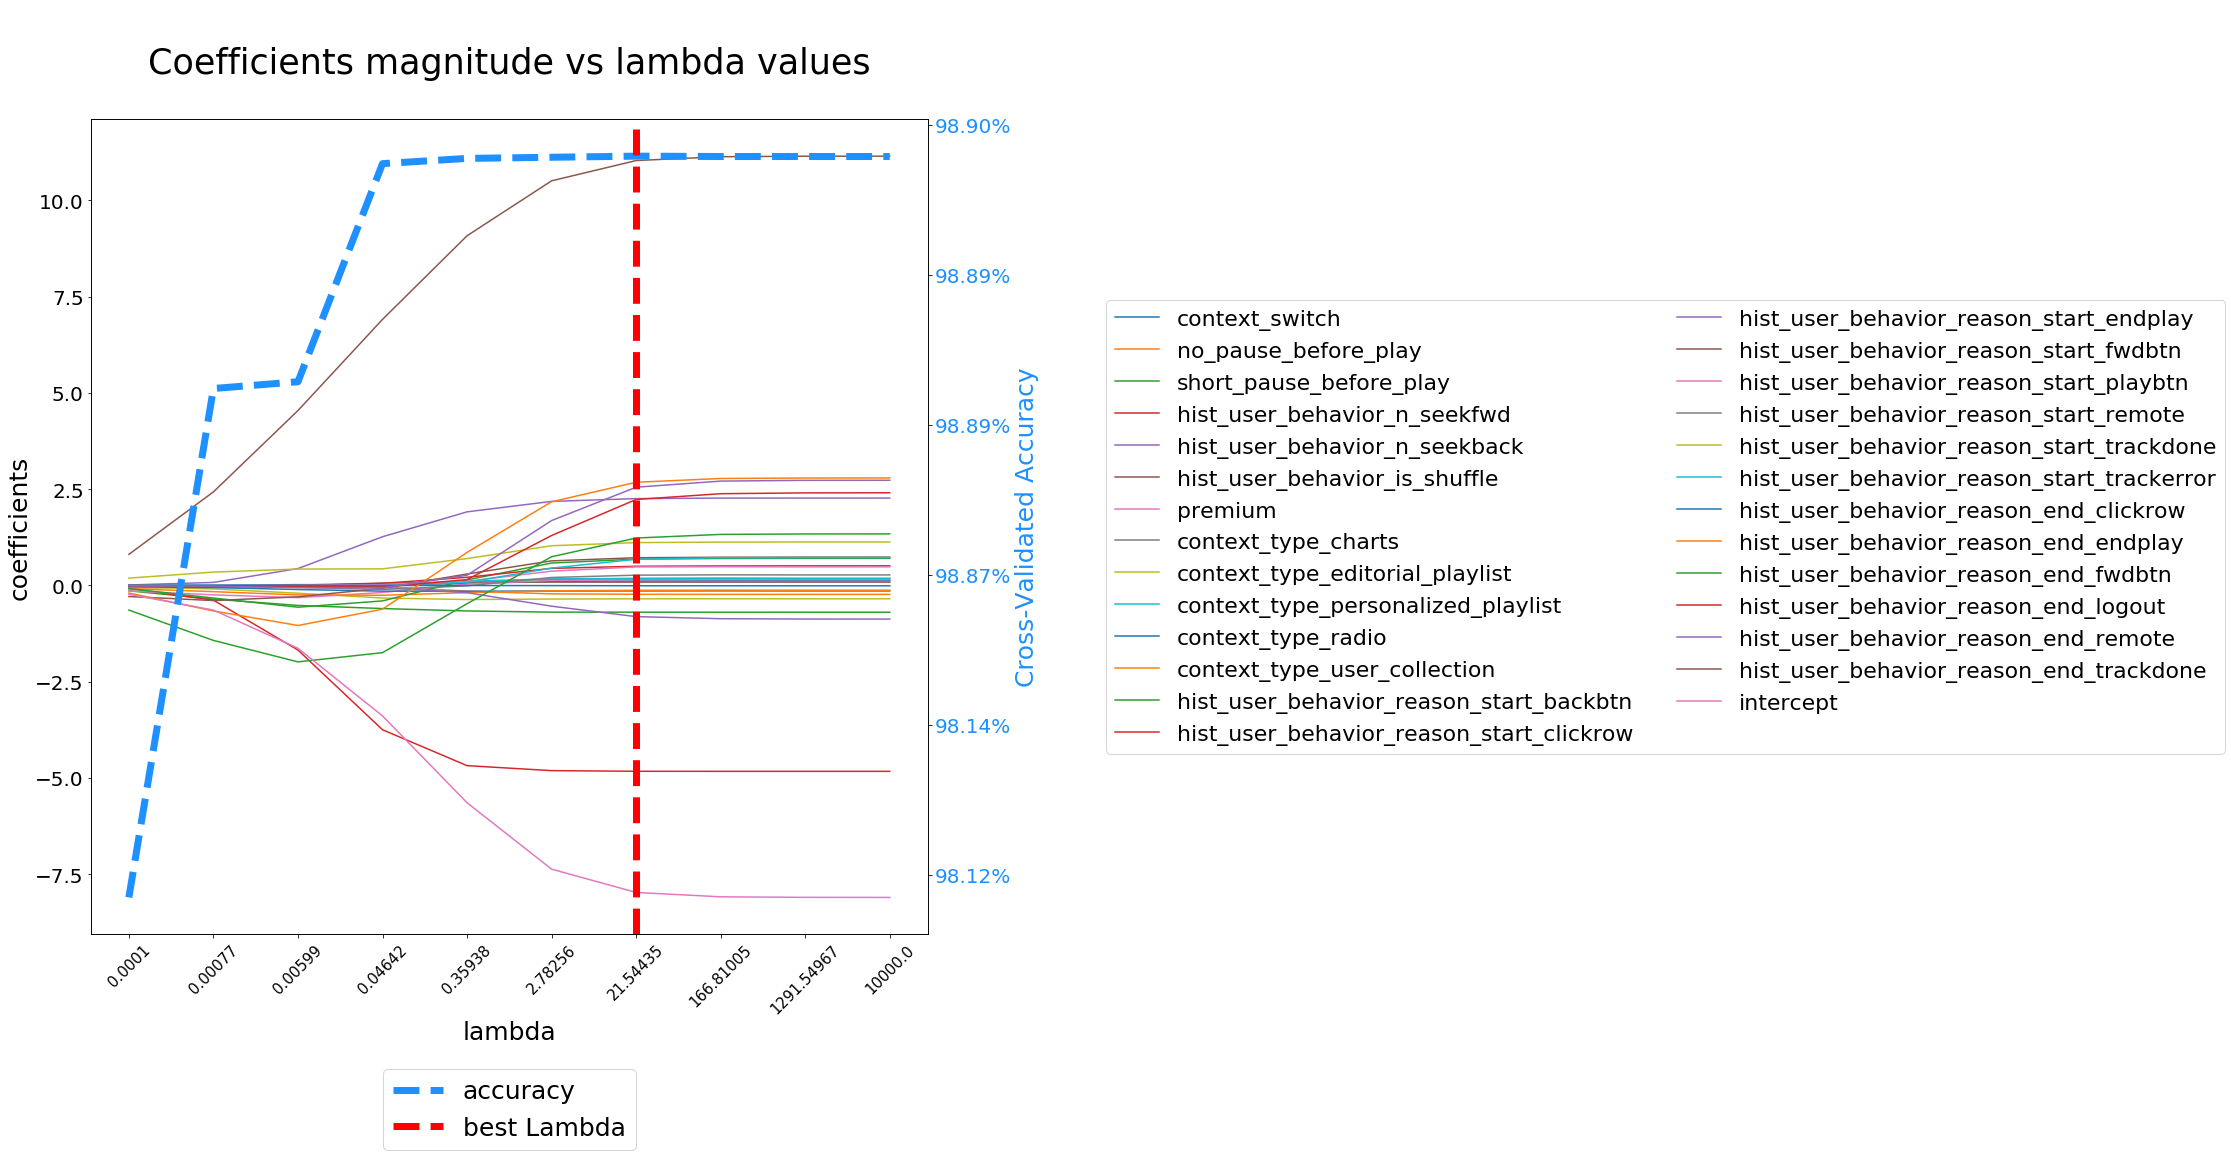

,Variable,Coefficient
0,intercept,-7.98436000
1,context_switch,0.11506600
2,no_pause_before_play,-0.22947000
3,short_pause_before_play,-0.69552200
4,hist_user_behavior_n_seekfwd,-4.81833200
5,hist_user_behavior_n_seekback,2.24948200
6,hist_user_behavior_is_shuffle,0.08442500
7,premium,0.14812300
8,context_type_charts,0.17914700
9,context_type_editorial_playlist,-0.34800300


,Penalty,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,l2,0.989012,0.9898,0.986114,0.987298,0.989494,0.9901


In [44]:
# fit Ridge on original dataset with all variables (so that some will be shrinked 0)
results_Ridge = fit_model(X_train_orig, X_test_orig, y_train, y_test, penalty='l2', n_fold=5)

In [72]:
# fit LogisticRegression on dataset with selected variables
results_NoPen = fit_model(X_train, X_test, y_train, y_test, penalty='none', n_fold=5)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Variable,Coefficient
0,intercept,-7.78444100
1,context_switch,0.03617300
2,no_pause_before_play,-0.21136700
3,short_pause_before_play,-0.41324200
4,long_pause_before_play,-0.21483200
5,hist_user_behavior_n_seekfwd,-5.00683200
6,hist_user_behavior_n_seekback,2.25150700
7,hist_user_behavior_is_shuffle,0.05983700
8,premium,0.06212700
9,context_type_charts,0.40954400


,Penalty,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,none,0.989267,0.98896,0.986395,0.986311,0.989802,0.989143


In [73]:
# compare performance
pd.concat([results_NoPen, results_LASSO, results_Ridge], axis=0)

,Penalty,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,none,0.989267,0.98896,0.986395,0.986311,0.989802,0.989143
0,l1,0.989025,0.98975,0.986132,0.987226,0.989504,0.990062
0,l2,0.989012,0.98980,0.986114,0.987298,0.989494,0.990100


In [48]:
#DECISION TREE


In [49]:
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [54]:
#import dataset
data=pd.read_excel('Spotify Dataset.xlsx', index_col=1)
data=data.dropna()

In [55]:
data.head()

,session_id,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,,,,,,,,,
1,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_f56065b2-b26f-4080-a121-ff3bf5d25fd6,False,False,False,True,0,0,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,trackdone
2,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_447a276d-5b3d-44cf-bcbe-834ad91e7b72,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,trackdone,fwdbtn
3,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_07a8a863-2f51-4e64-ae3c-2fac451a0651,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
4,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_d2a13f32-05a8-4f7b-8633-4ed8a74ca560,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
5,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_0368bff8-85c0-4162-b1ca-18c526b14d3a,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn


In [56]:
#get rid of the variables 
data.drop(['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'hour_of_day', 'date'], axis=1, inplace=True)

In [57]:

data.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,
1,True,0,0,0,0,0,0,False,True,radio,fwdbtn,trackdone
2,False,0,1,0,0,0,0,False,True,radio,trackdone,fwdbtn
3,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn
4,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn
5,False,0,1,0,0,0,0,False,True,radio,fwdbtn,fwdbtn


In [58]:
#transform the booleans in 0 and 1
data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]=(data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]==True).astype(int)

In [59]:
data.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,radio,fwdbtn,trackdone
2,0,0,1,0,0,0,0,0,1,radio,trackdone,fwdbtn
3,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn
4,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn
5,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn


In [60]:
#dummies 

dummy = pd.get_dummies(data[['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end']], drop_first = True)
dummy.head()

,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [61]:
#get rid of the columns that I have turned into dummies

step = pd.concat([data, dummy], axis=1)
step.drop(['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end'], inplace=True, axis=1)

In [62]:
step.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type_charts,...,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
# target variable and the regressors
X = step.iloc[:,1:]
y = step['not_skipped']

In [64]:
# K-fold Cross-Validation function

from sklearn.model_selection import KFold

def kFold_CV(X, y, model, n_fold, _display=True):

    # generate folds
    folds = KFold(n_splits=n_fold, random_state=0, shuffle=True)

    # fit model on each k-1 fold and evaluate performances (errors)
    results = pd.DataFrame(columns = ['Split', 'Train size', 'Test size', 'Train R^2', 'Train RMSE', 'Test RMSE'], dtype=float).fillna(0)


    fig = plt.figure(figsize=(10,1.5*n_fold))
    plot_count=1
    split_count=1
    model_list={}
    for train_index, test_index in folds.split(X, y):

        # define train and test (validation) set
        X_split_train = X.iloc[train_index, :]
        X_split_test = X.iloc[test_index, :]
        y_split_train = y.iloc[train_index, :]
        y_split_test = y.iloc[test_index, :]

        # plot target variable distribution comparison between split_train and split_test set
        ax = fig.add_subplot(math.ceil(n_fold / 3), 3, plot_count)
        sns.distplot(y_split_train, label='train', ax=ax)
        sns.distplot(y_split_test, label='test', ax=ax)
        ax.set_title('Target variable distribution\nsplit ' + str(split_count), fontsize=12)
        ax.legend(fontsize=8)

        # fit model on train set and get performances on train set
        model_fit = model.fit(X_split_train, y_split_train.values.ravel())
        y_train_predicted = model.predict(X_split_train)
        R2_train = metrics.r2_score(y_split_train, y_train_predicted)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_split_train, y_train_predicted))
        model_list['split_'+str(split_count)]=model_fit

        # get performance on test set
        y_test_predicted = model.predict(X_split_test)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_split_test, y_test_predicted))

        # append results
        results=results.append(pd.DataFrame([[split_count, X_split_train.shape[0], X_split_test.shape[0], R2_train,
                                              RMSE_train, RMSE_test]],
                      columns=results.columns))
        split_count += 1
        plot_count += 1

    results['Split']=results['Split'].astype(int)
    results['Train size']=results['Train size'].astype(int)
    results['Test size']=results['Test size'].astype(int)

    if _display==True:
        plt.tight_layout()
        fig.subplots_adjust(top=0.88)
        plt.show()
        display(results)
    else:
        plt.close()
    
    return results, model_list

In [65]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0, max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
model.fit(X_train, y_train)
print(model)

y_train_predicted = model.predict(X_train)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
y_test_predicted = model.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))

print('\n\nRoot Mean Squared Error on train set:', RMSE_train)
print('Root Mean Squared Error on test set:', RMSE_test)
print('Mean of y_train:', float(y.mean()))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


Root Mean Squared Error on train set: 0.09882687922411729
Root Mean Squared Error on test set: 0.10529649555232867
Mean of y_train: 0.3387333873338733


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


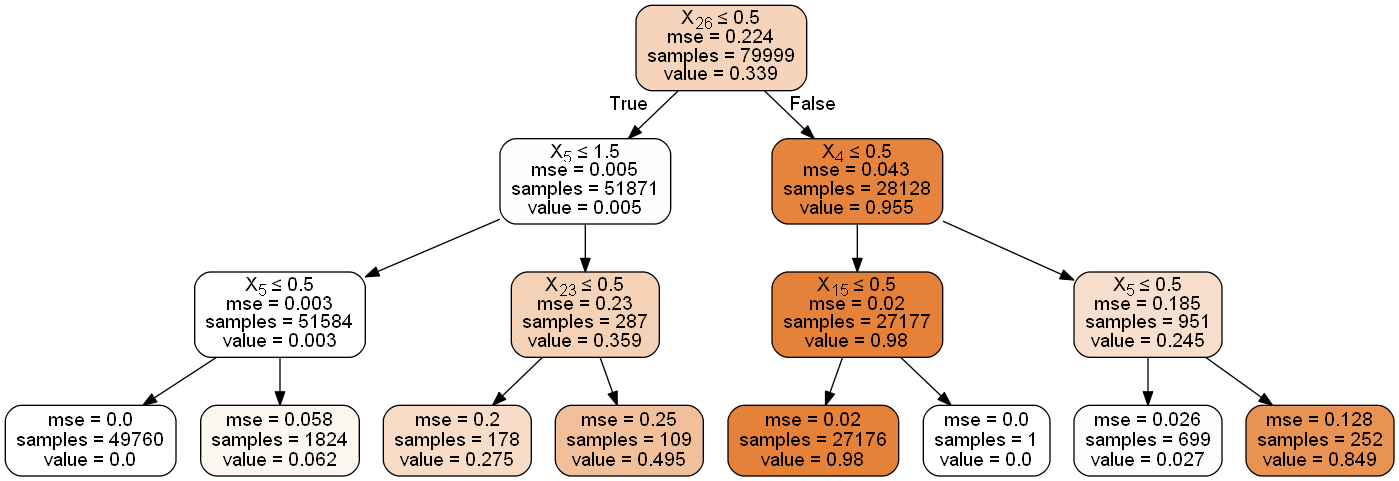

In [66]:
# plot tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
# predicted values are the mean value in each terminal node

pd.DataFrame({'True': y_train.values.flatten(), 'Predicted': y_train_predicted.flatten()})

,True,Predicted
0,0,0.000442
1,0,0.000442
2,0,0.000442
3,0,0.000442
4,0,0.000442
5,1,0.979725
6,1,0.979725
7,0,0.000442
8,1,0.979725
9,1,0.979725


,Variable,Importance
26,hist_user_behavior_reason_end_trackdone,0.961007
4,hist_user_behavior_n_seekfwd,0.028940
5,hist_user_behavior_n_seekback,0.009806
23,hist_user_behavior_reason_end_fwdbtn,0.000191
15,hist_user_behavior_reason_start_endplay,0.000056
25,hist_user_behavior_reason_end_remote,0.000000
24,hist_user_behavior_reason_end_logout,0.000000
22,hist_user_behavior_reason_end_endplay,0.000000
21,hist_user_behavior_reason_end_clickrow,0.000000
20,hist_user_behavior_reason_start_trackerror,0.000000


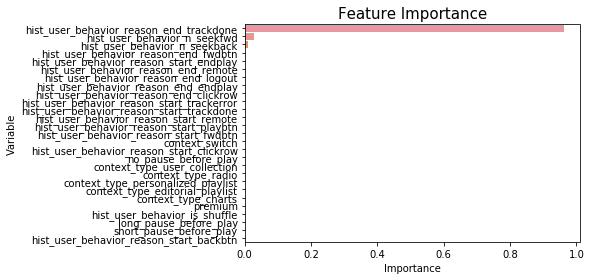

In [68]:
# features importance 

feat_importance = pd.DataFrame({'Variable': X.columns, 'Importance': model.feature_importances_}).sort_values(by=['Importance'], ascending=False)
display(feat_importance)

sns.barplot(y='Variable', x='Importance', data=feat_importance)
plt.title('Feature Importance', fontsize=15)
plt.show()

In [69]:
#RANDOM FOREST TREE

In [79]:
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [80]:
data=pd.read_excel('Spotify Dataset.xlsx', index_col=1)
data=data.dropna()
print(data.shape)
print(list(data.columns))
print(data.ndim)

(99999, 20)
['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play', 'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']
2


In [81]:
#get rid of the variables 
data.drop(['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'hour_of_day', 'date'], axis=1, inplace=True)

In [82]:
#transform the booleans in 0 and 1
data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]=(data[['not_skipped', 'hist_user_behavior_is_shuffle', 'premium']]==True).astype(int)

In [83]:
data.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,radio,fwdbtn,trackdone
2,0,0,1,0,0,0,0,0,1,radio,trackdone,fwdbtn
3,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn
4,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn
5,0,0,1,0,0,0,0,0,1,radio,fwdbtn,fwdbtn


In [84]:
#dummies 

dummy = pd.get_dummies(data[['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end']], drop_first = True)
dummy.head()

,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [85]:
#get rid of the columns that I have turned into dummies

step = pd.concat([data, dummy], axis=1)
step.drop(['context_type',
'hist_user_behavior_reason_start',
'hist_user_behavior_reason_end'], inplace=True, axis=1)

In [86]:
step.head()

,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type_charts,...,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
X = step.iloc[:,1:]
y = step['not_skipped']

In [88]:
# K-fold Cross-Validation function

from sklearn.model_selection import KFold

def kFold_CV(X, y, model, n_fold, _display=True):

    # generate folds
    folds = KFold(n_splits=n_fold, random_state=0, shuffle=True)

    # fit model on each k-1 fold and evaluate performances (errors)
    results = pd.DataFrame(columns = ['Split', 'Train size', 'Test size', 'Train R^2', 'Train RMSE', 'Test RMSE'], dtype=float).fillna(0)


    fig = plt.figure(figsize=(10,1.5*n_fold))
    plot_count=1
    split_count=1
    model_list={}
    for train_index, test_index in folds.split(X, y):

        # define train and test (validation) set
        X_split_train = X.iloc[train_index, :]
        X_split_test = X.iloc[test_index, :]
        y_split_train = y.iloc[train_index, :]
        y_split_test = y.iloc[test_index, :]

        # plot target variable distribution comparison between split_train and split_test set
        ax = fig.add_subplot(math.ceil(n_fold / 3), 3, plot_count)
        sns.distplot(y_split_train, label='train', ax=ax)
        sns.distplot(y_split_test, label='test', ax=ax)
        ax.set_title('Target variable distribution\nsplit ' + str(split_count), fontsize=12)
        ax.legend(fontsize=8)

        # fit model on train set and get performances on train set
        model_fit = model.fit(X_split_train, y_split_train.values.ravel())
        y_train_predicted = model.predict(X_split_train)
        R2_train = metrics.r2_score(y_split_train, y_train_predicted)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_split_train, y_train_predicted))
        model_list['split_'+str(split_count)]=model_fit

        # get performance on test set
        y_test_predicted = model.predict(X_split_test)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_split_test, y_test_predicted))

        # append results
        results=results.append(pd.DataFrame([[split_count, X_split_train.shape[0], X_split_test.shape[0], R2_train,
                                              RMSE_train, RMSE_test]],
                      columns=results.columns))
        split_count += 1
        plot_count += 1

    results['Split']=results['Split'].astype(int)
    results['Train size']=results['Train size'].astype(int)
    results['Test size']=results['Test size'].astype(int)

    if _display==True:
        plt.tight_layout()
        fig.subplots_adjust(top=0.88)
        plt.show()
        display(results)
    else:
        plt.close()
    
    return results, model_list

In [89]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 50, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
model.fit(X_train, y_train.values.flatten())
print(model)

y_train_predicted = model.predict(X_train)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
y_test_predicted = model.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))

print('\n\nRoot Mean Squared Error on train set:', RMSE_train)
print('Root Mean Squared Error on test set:', RMSE_test)
print('Mean of y_train:', float(y.mean()))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


Root Mean Squared Error on train set: 0.08721280950953403
Root Mean Squared Error on test set: 0.1051392623351552
Mean of y_train: 0.3387333873338733


In [90]:
# access all the fitted trees
model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, 

,Variable,Importance
26,hist_user_behavior_reason_end_trackdone,0.948617
4,hist_user_behavior_n_seekfwd,0.030754
5,hist_user_behavior_n_seekback,0.010675
22,hist_user_behavior_reason_end_endplay,0.001139
12,context_type_user_collection,0.000846
7,premium,0.000823
6,hist_user_behavior_is_shuffle,0.000775
23,hist_user_behavior_reason_end_fwdbtn,0.000737
1,no_pause_before_play,0.000732
14,hist_user_behavior_reason_start_clickrow,0.000613


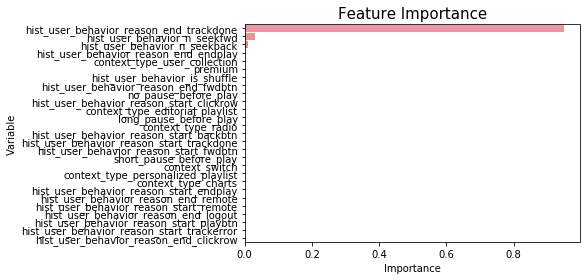

In [91]:
# get features importance and plot

feat_importance = pd.DataFrame({'Variable': X.columns, 'Importance': model.feature_importances_}).sort_values(by=['Importance'], ascending=False)
display(feat_importance)

sns.barplot(y='Variable', x='Importance', data=feat_importance)
plt.title('Feature Importance', fontsize=15)
plt.show()

In [92]:
# recall all available parameters for Random Forest
print(RandomForestRegressor())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [93]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(max_features = 10, random_state = 0).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.99
